<a href="https://colab.research.google.com/github/sua11111/Water-Pipe-Leak-Detection-Model/blob/main/Water_Pipe_Leak_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이프관 누수 예측 분류 2D-CNN Model

## 목차
1. 주제 및 주제 선정 배경
2. 데이터 설명 및 이슈
3. 데이터 EDA
4. 파형 데이터 전처리
5. 파형 데이터 특징 추출
6. 2D-CNN Modeling
7. 결과
8. 아쉬웠던 점



## 1. 주제 선정 배경

주제 : 

누수 파이프관과 정상인 파이프관의 소리를 딥러닝 모델로 학습시켜 파이프관 상태를 분류하는 CNN 모델을 구축하여 보다 더 효율적으로 파이프관 상태를 관리하자

선정 이유 : 

파이프관 누수 관리를 편리하고 효율성있게 관리하기 위함

## 2. 데이터 설명 및 이슈

**Data Info**

✅ .wav 파일 형식으로 된 파형 데이터

✅ data

leak(누수) data : 1596개의 .wav file

normal(정상) data : 5170개의 .wav file

**Issue Point**

✅ leak, normal file 의 데이터 불균형

✅ 파형 데이터 길이가 각각 다른 상태(약 3~10초)

✅ leak, normal file 에 noize 존재



## 3. 데이터 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 압축 풀기
!unzip -qq "/content/drive/MyDrive/dataset.zip"

In [ ]:
!pip install noisereduce

In [ ]:
import numpy as np 
import itertools
import librosa, librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import pandas as pd 
import os
import noisereduce as nr # install
from sklearn.decomposition import PCA

np.random.seed(0)

### file upload

#### sample rate(= sr)
프로젝트 데이터는 초당 22050개의 샘플을 갖고 있는 파형 데이터 입니다.

sr = 22050

l = leak file 데이터 개수

n = normal file 데이터 개수

In [ ]:
l = 1596 # leak file
n = 5170 # normal file

sr = 22050 # sample rate
maxlen = 226674 # file maxlen

#### leak

In [ ]:
# leak path

path_leak = "/content/train/leak"
leak_list = os.listdir(path_leak) 
#file_list_py = [file for file in file_list if file.endswith('.wav')]

In [ ]:
# leak 

leak = []

for i in range(l):
    a = path_leak +"/"+ leak_list[i]
    leak_tmp, _ = librosa.load(a)
    leak += [leak_tmp]

#### normal

In [ ]:
# normal path

path_normal = "/content/train/normal"
normal_list = os.listdir(path_normal) 
# normal_list_py = [file for file in file_list if file.endswith('.wav')]

In [ ]:
# normal

normal = []

for i in range(n):
    a = path_normal +"/"+ normal_list[i]
    normal_tmp, _ = librosa.load(a)
    normal += [normal_tmp]

#### 전처리 전 파형 그래프
 * 누수 파이프관 10개 샘플 파일
 * 다양한 형태의 파형 확인 가능

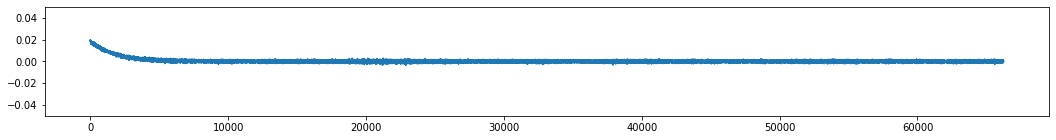

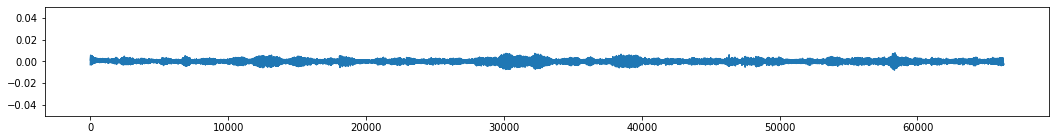

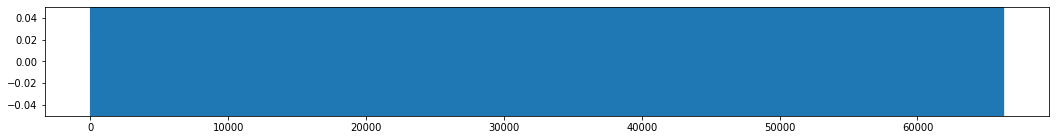

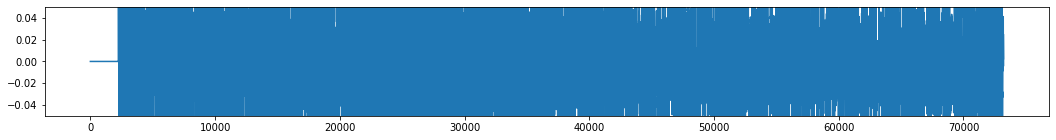

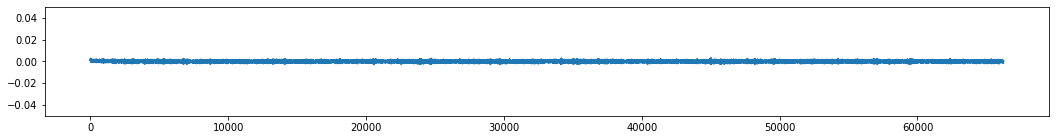

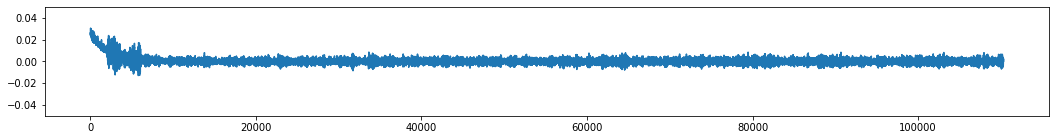

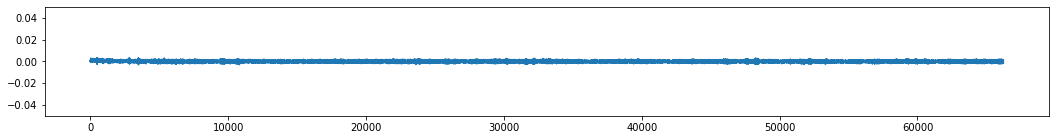

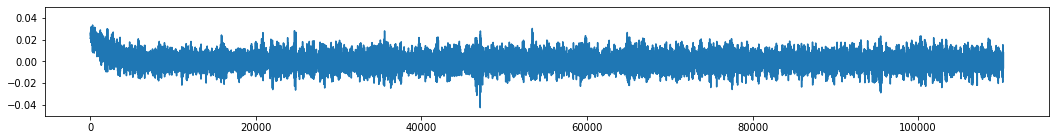

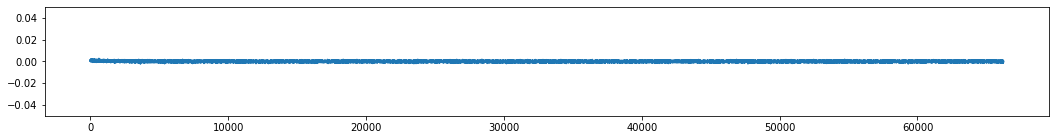

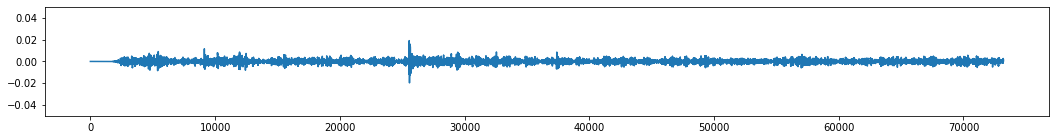

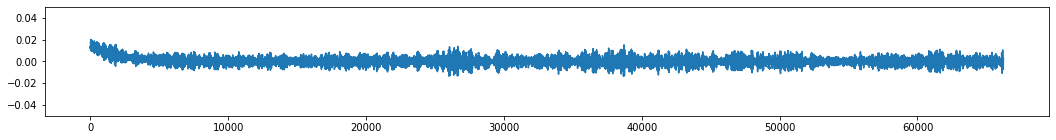

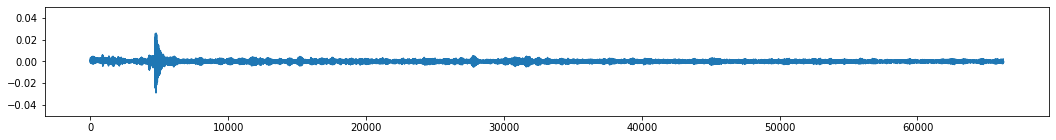

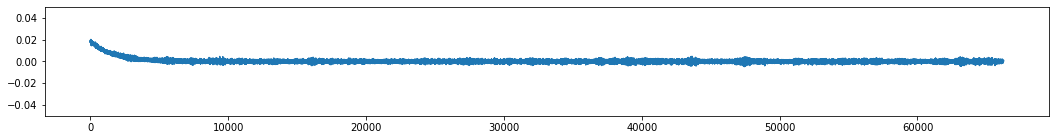

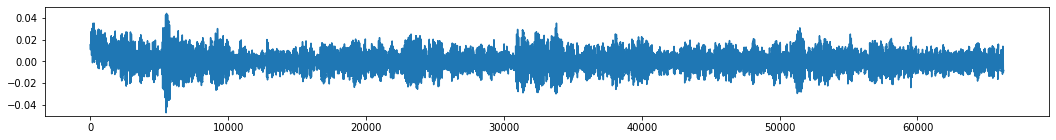

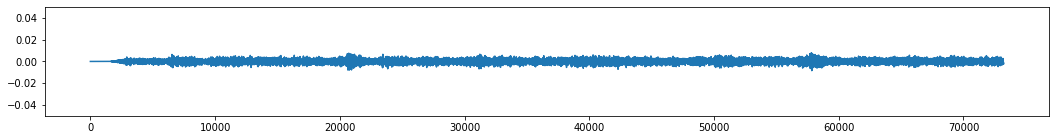

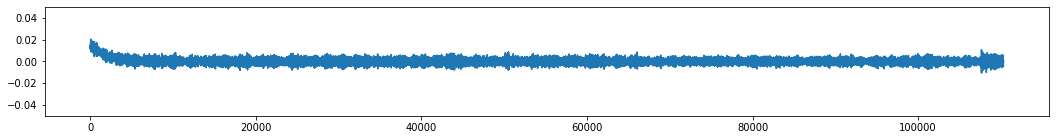

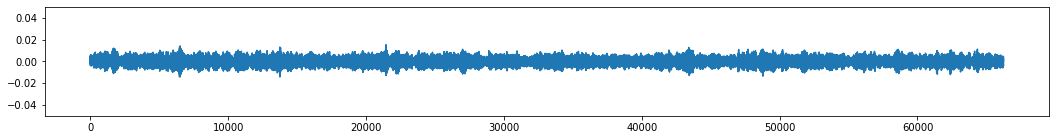

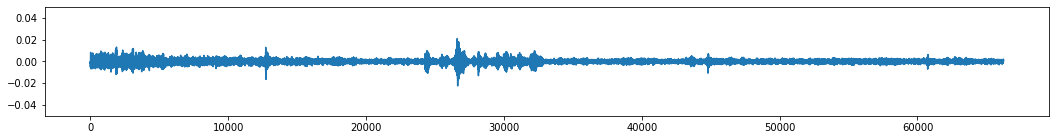

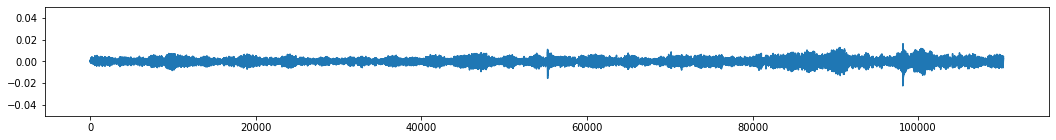

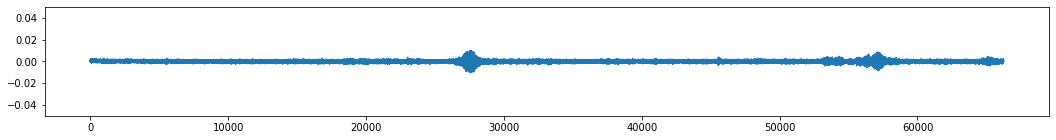

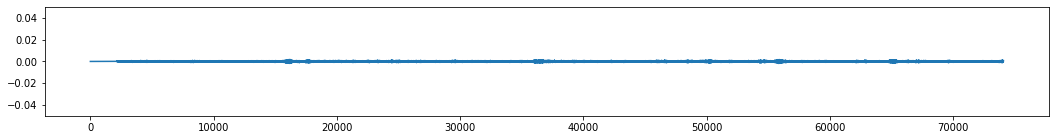

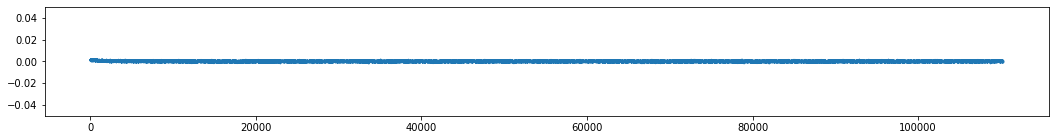

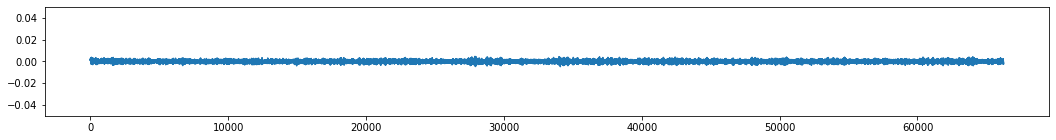

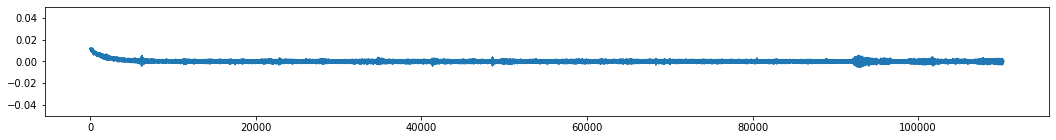

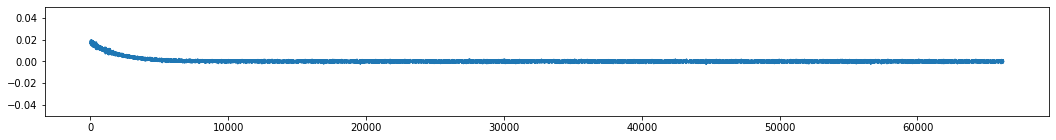

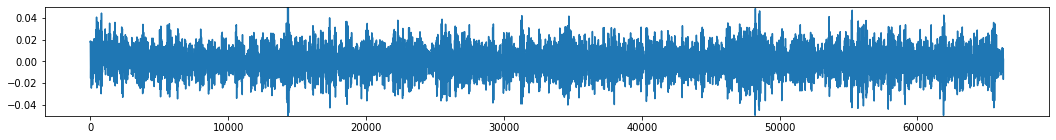

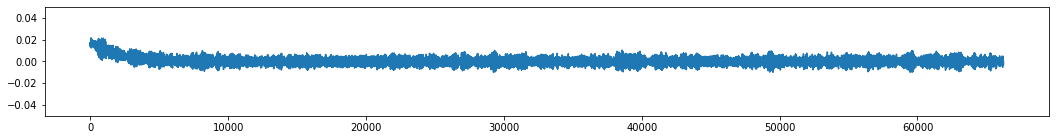

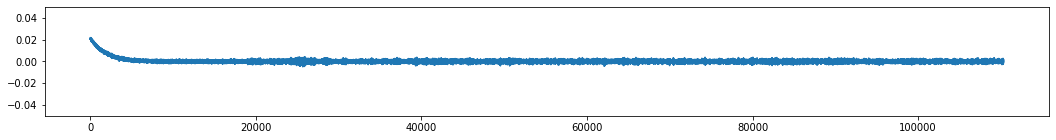

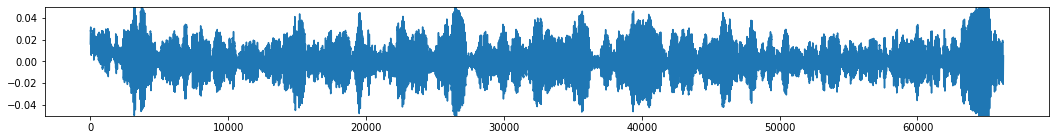

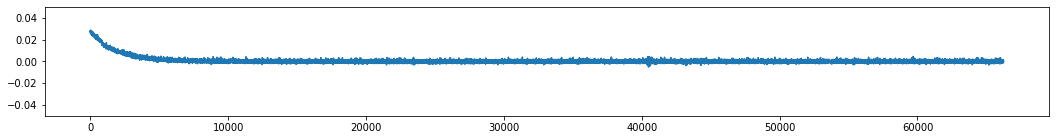

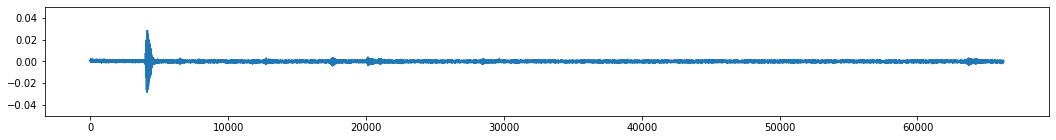

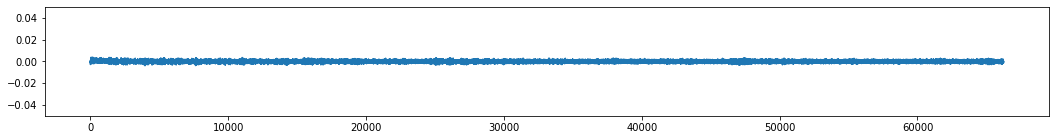

In [ ]:
for idx in range(0, len(leak), 50):
  plt.figure(figsize=(18,2))
  plt.plot(leak[idx])
  plt.ylim((-0.05, 0.05))
  plt.show()

## 4. 데이터 전처리

### Data zero padding

In [ ]:
# leak padding

for i in range(l):
  leak[i] = np.pad(leak[i], (0, maxlen - len(leak[i])), 'constant', constant_values=0)

In [ ]:
# normal padding

for i in range(n):
  normal[i] = np.pad(normal[i], (0, maxlen - len(normal[i])), 'constant', constant_values=0)

#### 데이터의 길이를 맞춰준 후 파형 그래프
* 파형 데이터들의 뒷부분이 0으로 채워진 것을 확인 가능

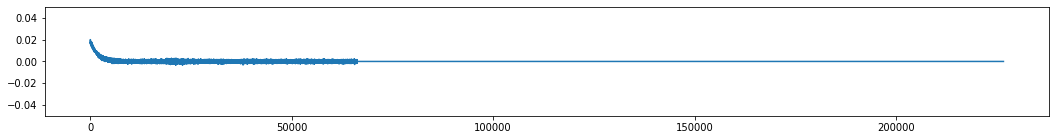

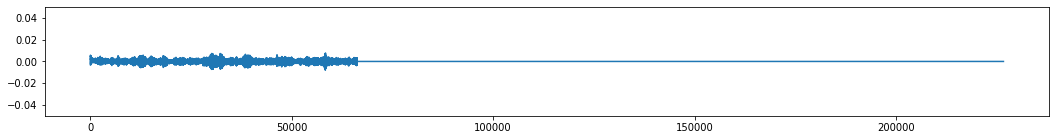

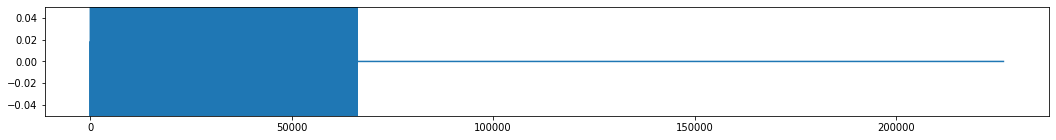

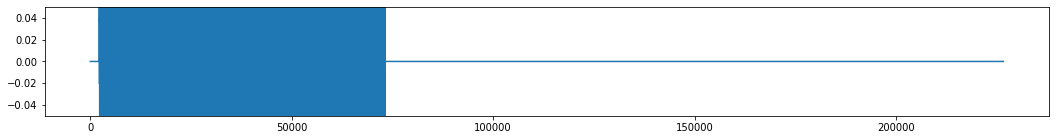

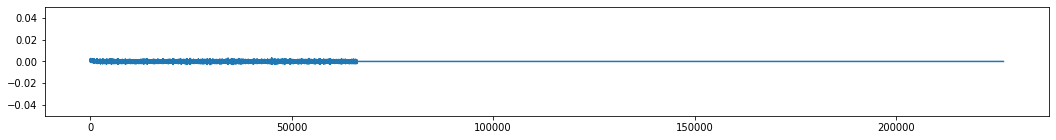

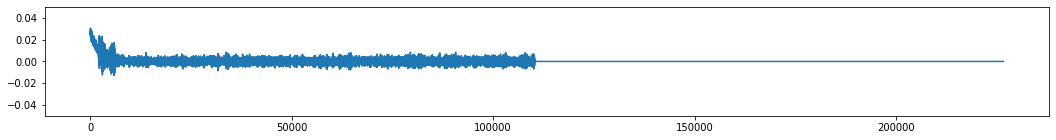

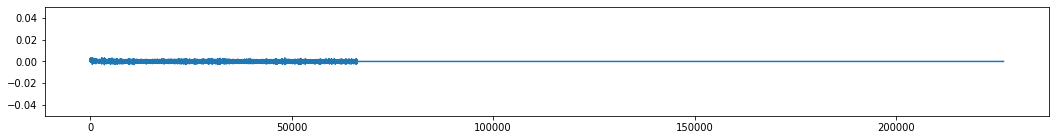

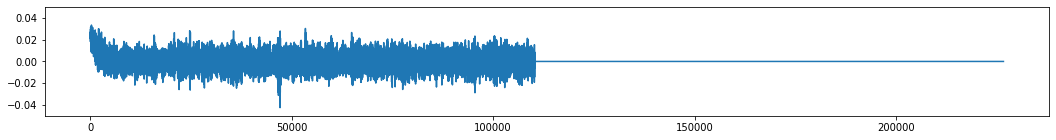

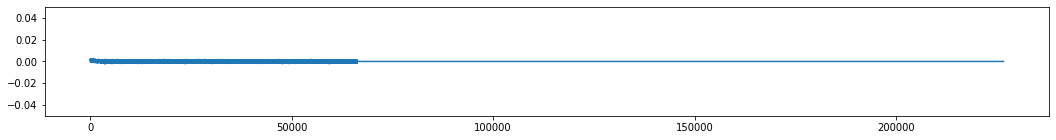

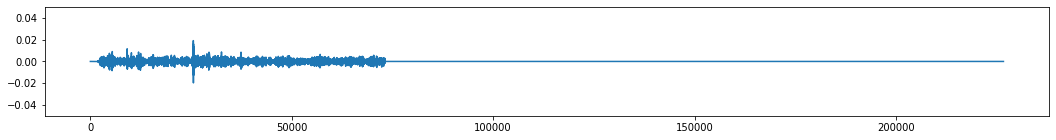

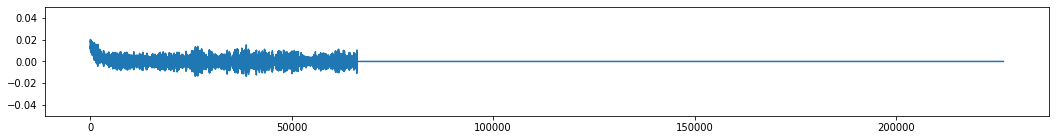

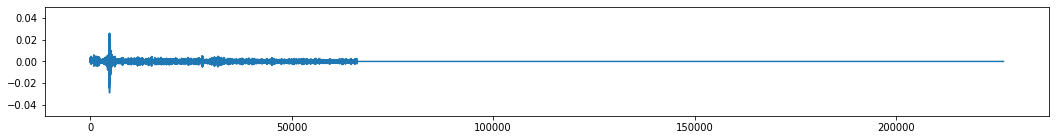

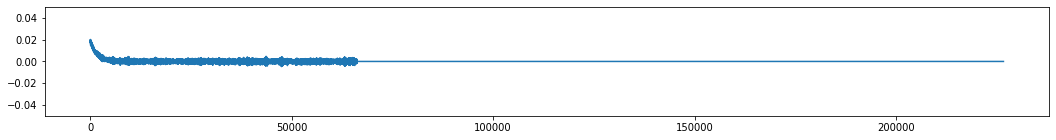

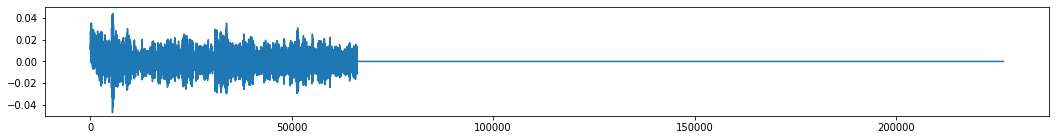

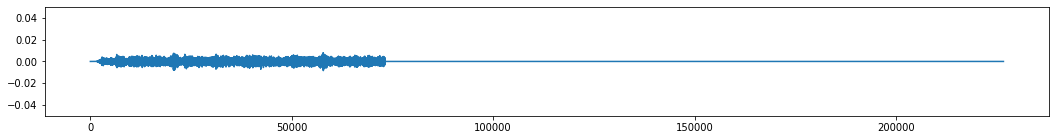

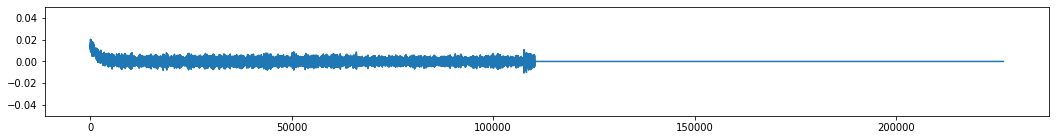

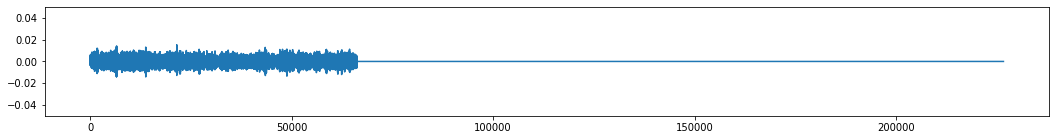

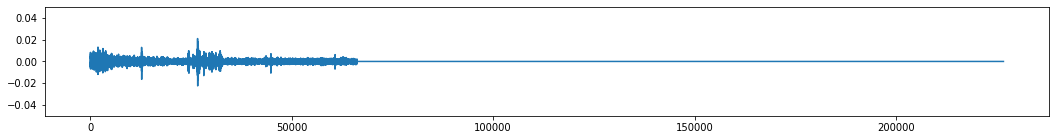

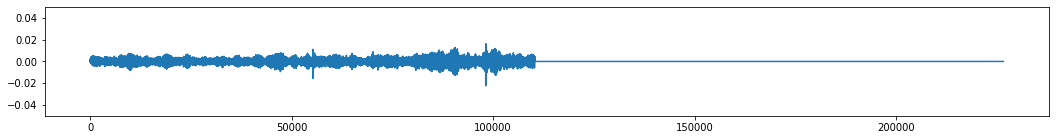

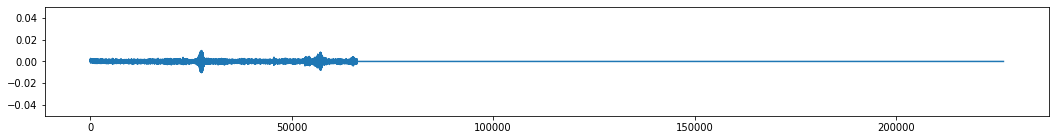

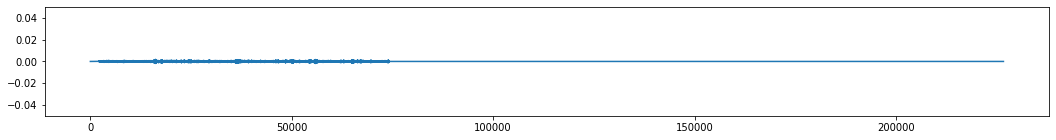

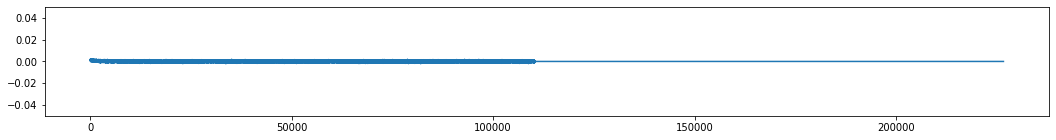

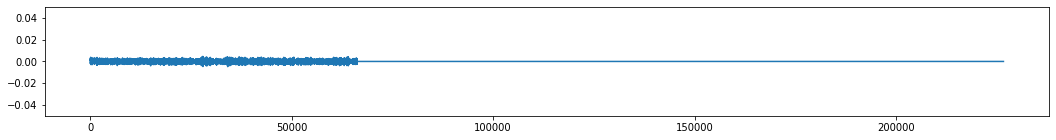

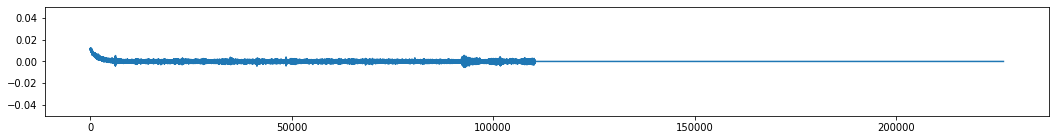

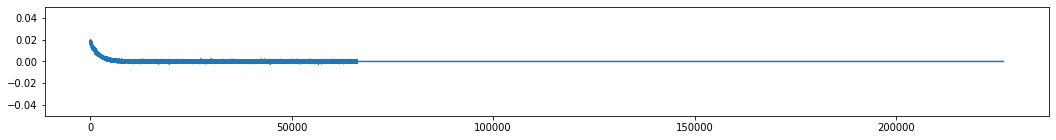

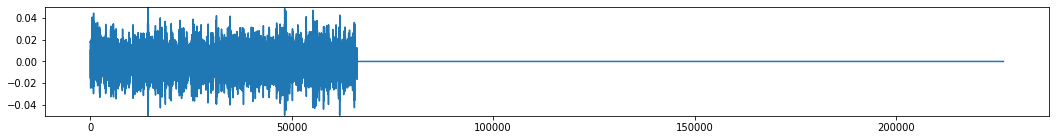

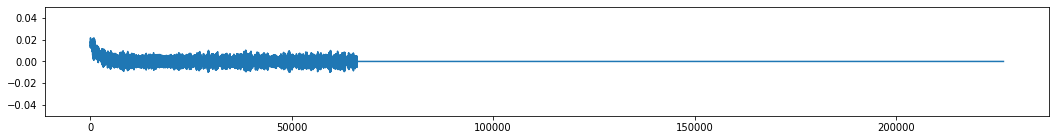

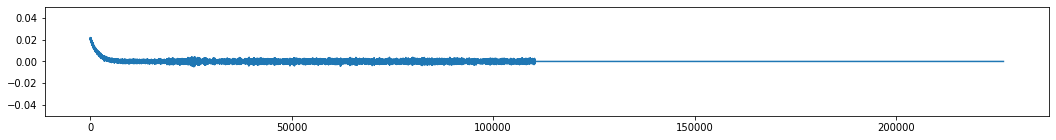

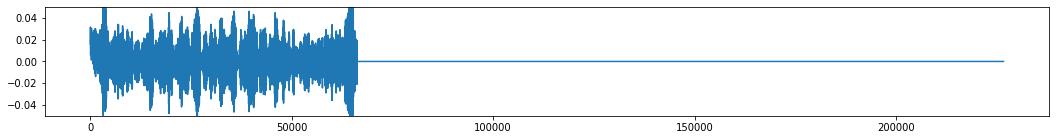

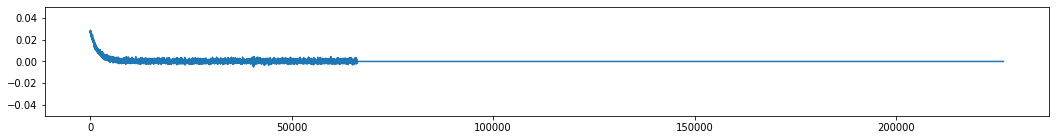

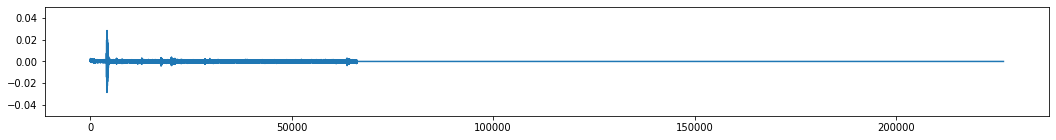

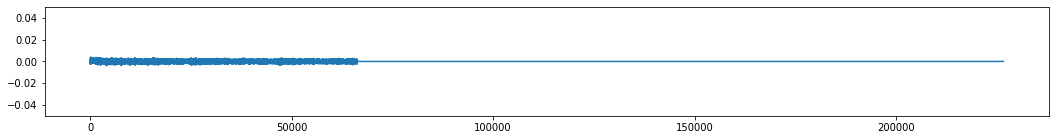

In [ ]:
for idx in range(0, len(leak), 50):
  plt.figure(figsize=(18,2))
  plt.plot(leak[idx])
  plt.ylim((-0.05, 0.05))
  plt.show()

### 정규화 (pass)
❌   정규화는 -1 ~ 1 사이의 범위를 갖도록 하려고 했으나 이미 normal, leak file이 -1.0 ~ 0.9999695 사이여서 정규화 작업을 건너뛰었습니다.

In [ ]:
# normal.min(), normal.max()

(-1.0, 0.9999695)

In [ ]:
# leak.min(), leak.max()

(-1.0, 0.9999695)

In [ ]:
# # 정규화는 -1 ~ 1 사이의 범위를 갖도록 정규화
# nptrain = ((nptrain - nptrain.min()) / (nptrain.max() - nptrain.min())) * 2 - 1
# nptrain.min(), nptrain.max()

In [ ]:
# # leak

# leak = ((leak - leak.min()) / (leak.max() - leak.min())) * 2 - 1
# leak.min(), leak.max()

(-1.0, 1.0)

In [ ]:
# # normal

# normal = ((normal - normal.min()) / (normal.max() - normal.min())) * 2 - 1
# normal.min(), normal.max()

(-1.0, 1.0)

### 노이즈 제거
 
* noizereduce 이용

In [ ]:
leak = np.array(leak)

normal = np.array(normal)

In [ ]:
def reduce_noise(x):
    reduced_noise = nr.reduce_noise(y=x, sr=sr)
    return x

In [ ]:
leak = reduce_noise(leak)

In [ ]:
# 램이 터져서 나누어서 노이즈 제거

normal1 = normal[0:1723]
normal2 = normal[1723:3446]
normal3 = normal[3446:]

In [ ]:
normal1 = reduce_noise(normal1)

In [ ]:
normal2 = reduce_noise(normal2)

In [ ]:
normal3 = reduce_noise(normal3)

#### 노이즈 제거 후 그래프

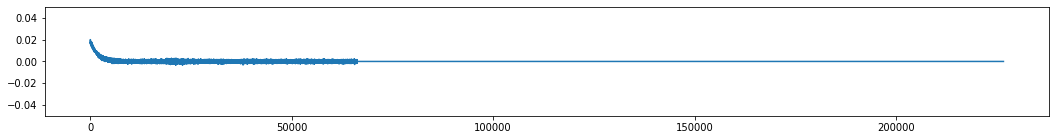

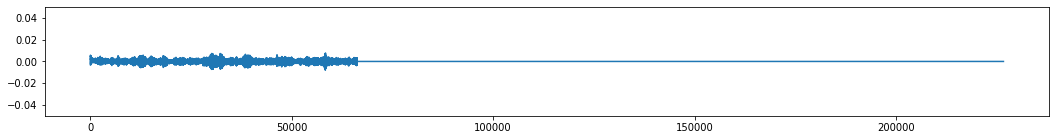

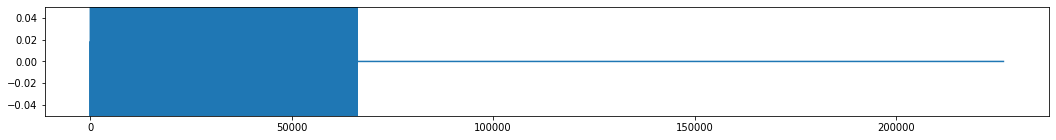

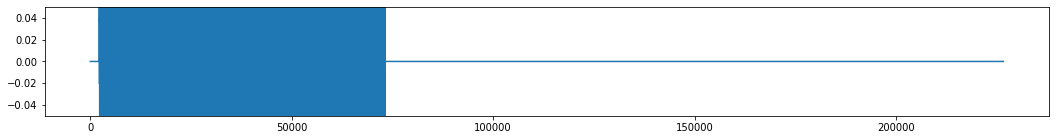

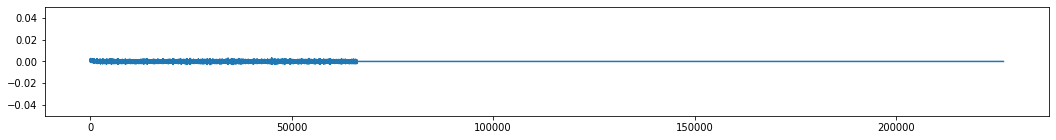

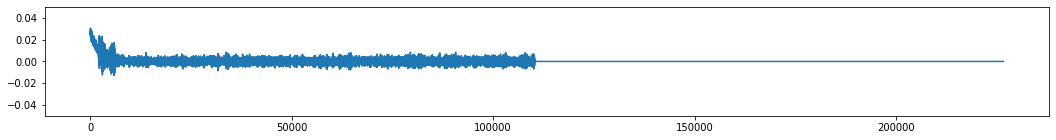

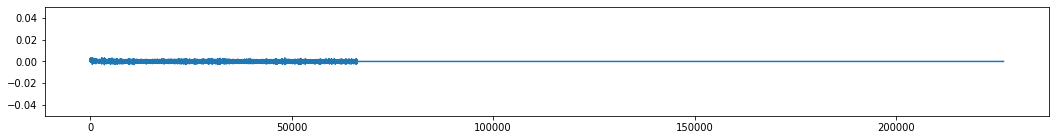

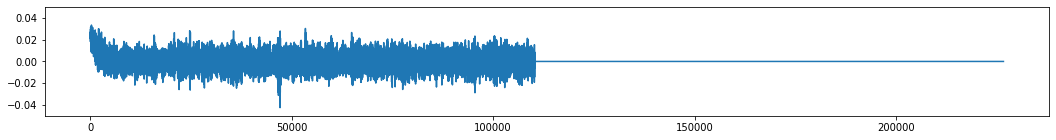

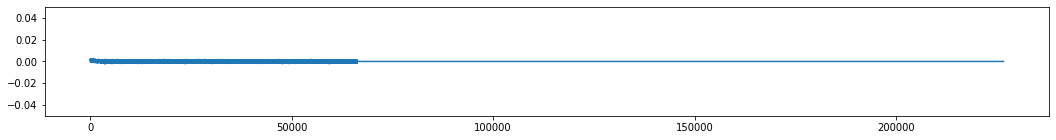

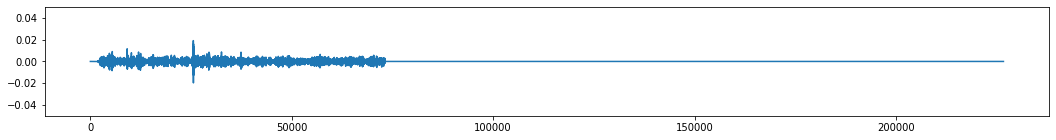

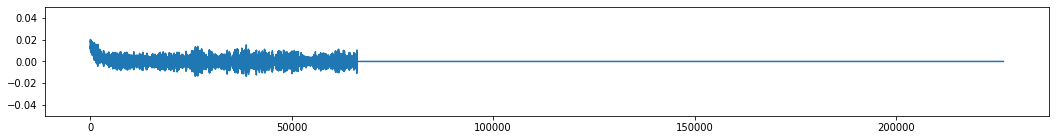

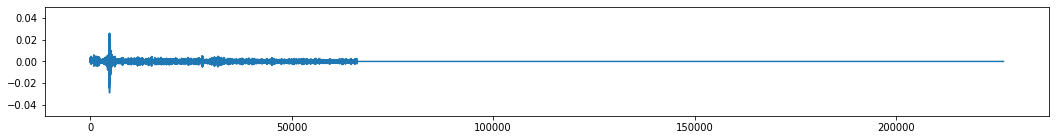

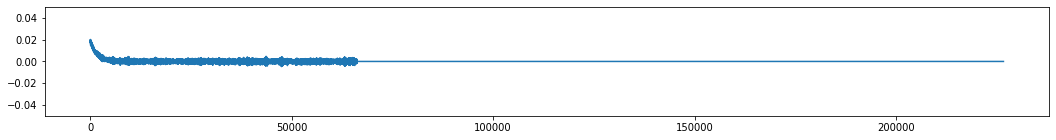

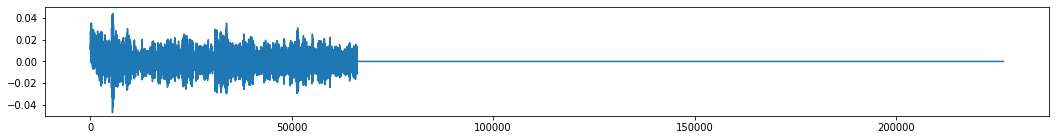

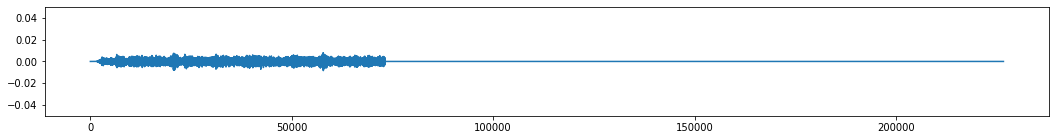

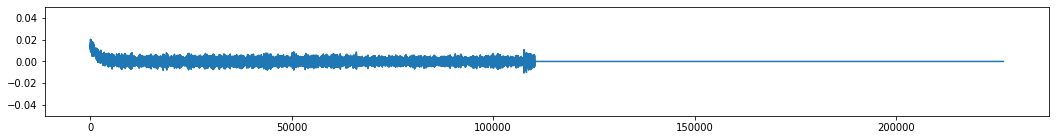

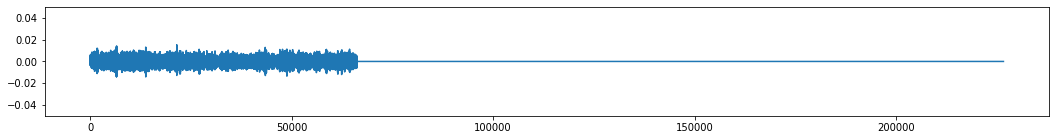

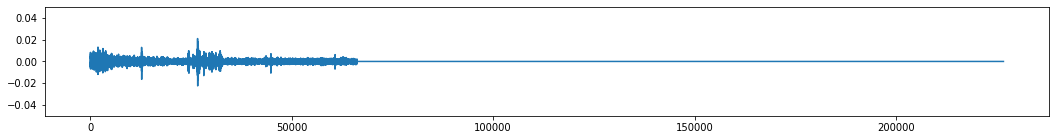

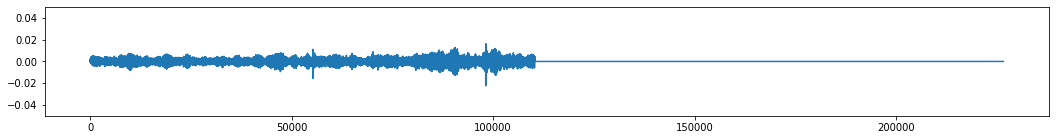

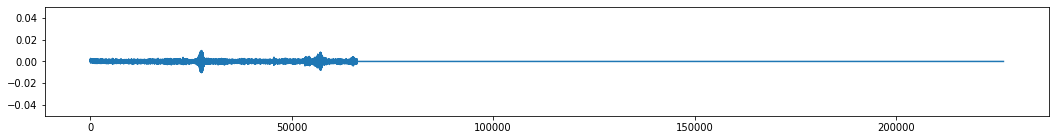

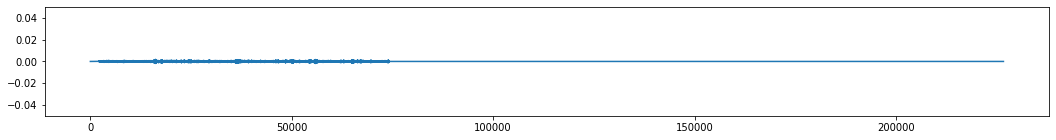

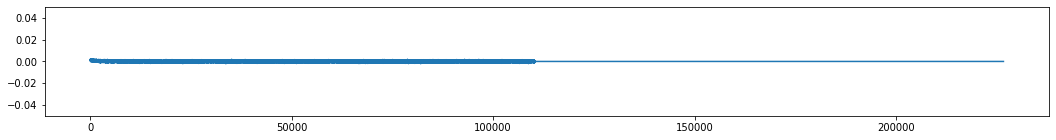

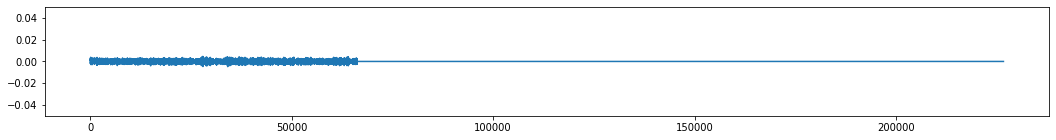

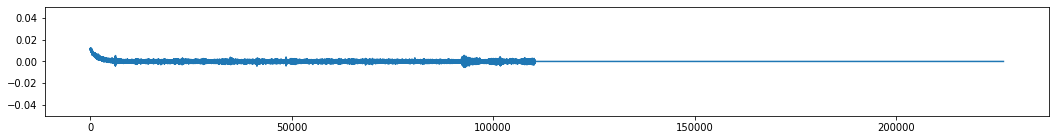

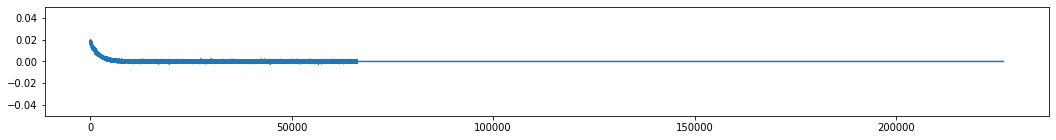

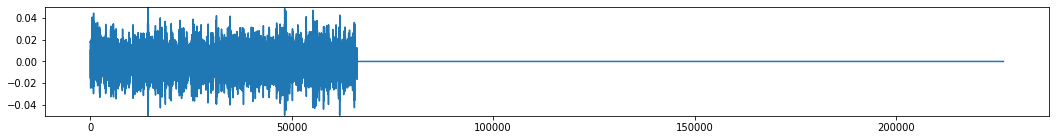

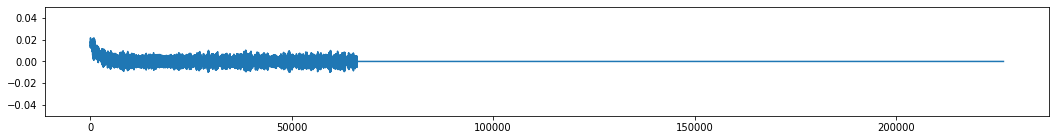

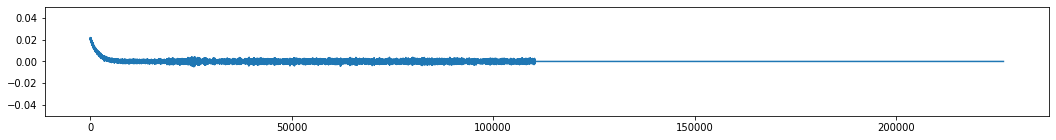

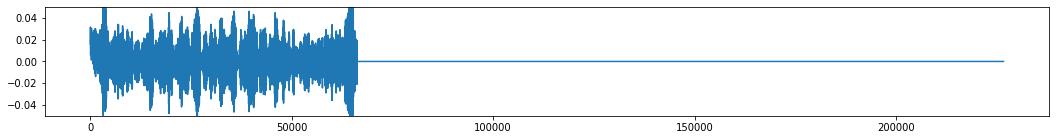

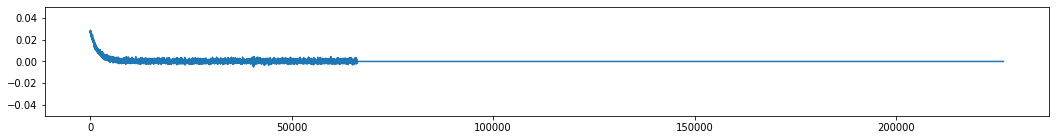

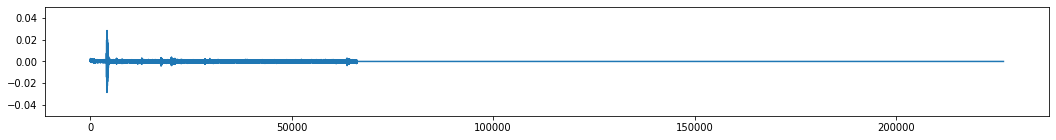

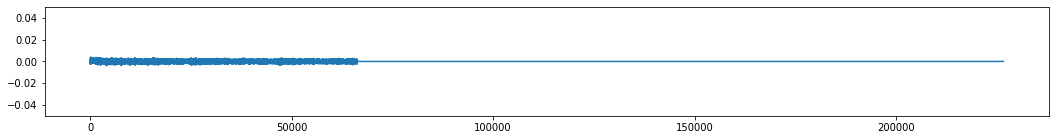

In [ ]:
for idx in range(0, len(leak), 50):
  plt.figure(figsize=(18,2))
  plt.plot(leak[idx])
  plt.ylim((-0.05, 0.05))
  plt.show()

### mu law 변환

In [ ]:
def mu_law(x, mu=255):
     return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)

In [ ]:
leak = mu_law(leak)

In [ ]:
normal1 = mu_law(normal1)

In [ ]:
normal2 = mu_law(normal2)

In [ ]:
normal3 = mu_law(normal3)

#### mu 변환 후 그래프

In [ ]:
# plt.figure(figsize=(12, 5))
# plt.plot(normal[0], color='grey')
# plt.title('Mu Law Audio File')
# plt.show()

### train set concat

In [ ]:
# leak file 복제 => 데이터 불균형 해결
leak = np.concatenate((leak, leak, leak), axis=0)

In [ ]:
len(leak) # concat 잘 되었는지 확인 
# 4788 

4788

In [ ]:
# 분리해줬던 normal file concat
normal = np.concatenate((normal1, normal2, normal3), axis=0)

In [ ]:
len(normal)
# 5170

5170

#### leak, normal file concatenate

In [ ]:
# leak, normal concat 

nptrain = np.concatenate((leak, normal), axis=0)
print(nptrain.shape) # (9958, 226674) 출력되야 함 (l*3) + n = 9958, sr = 226674

(9958, 226674)


## 5. 파형 데이터 특징 추출

### mel 특징 추출

In [ ]:
mel = len(leak) + len(normal)
mel

9958

In [ ]:
# mel train 6min(db)
meltrain = []

for i in range(mel):
  meltrain_tmp = librosa.amplitude_to_db(librosa.feature.melspectrogram(nptrain[i], sr=sr),ref=np.max)
  #meltrain_tmp = librosa.feature.melspectrogram(nptrain[i], sr=sr)
  meltrain += [meltrain_tmp]

### leak, normal labeling

비정상 : leak = 1

정상 : normal = 0

In [ ]:
# leak label

leak_label = np.ones((4788, 1))

In [ ]:
# normal label

normal_label = np.zeros((len(normal), 1))

In [ ]:
y_label = np.concatenate((leak_label, normal_label), axis=0)
print(y_label.shape)

(9958, 1)


In [ ]:
# labeling 후 비율 그래프(circle graph)

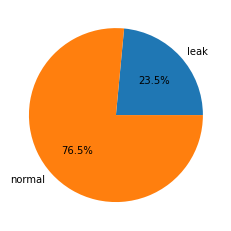

In [ ]:
ratio = [23.5, 76.5]
labels = ['leak', 'normal']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### leak data 복제 후 데이터 비율

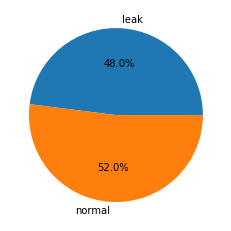

In [ ]:
ratio = [48, 52]
labels = ['leak', 'normal']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 2D-CNN modeling


In [ ]:
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import ModelCheckpoint 
import tensorflow

In [ ]:
npmeltrain = np.array(meltrain, np.float32)

np_mel = np.expand_dims(npmeltrain, -1)
y_cat = to_categorical(y_label)

In [ ]:
# trian, test split

train_x, test_x, train_y, test_y = train_test_split(np_mel, y_cat, test_size=0.2)

In [ ]:
np_mel.shape  # (9958, 128, 443, 1)

(9958, 128, 443, 1)

In [ ]:
print(train_x.shape) # input shape : 128, 231, 1
print(test_x.shape) 
print(train_y.shape)
print(test_y.shape)

(7966, 128, 443, 1)
(1992, 128, 443, 1)
(7966, 2)
(1992, 2)


In [ ]:
input_shape = (128, 443, 1)

model = Sequential()

model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2, padding='same'))


model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2, padding='same'))


model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 128, 443, 32)      320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 64, 222, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 222, 64)       18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 111, 128)      73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 56, 128)     

In [ ]:
# model checkpoint

checkpoint_path = "./cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path) # Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                   save_weights_only=True,
                                   verbose=1) # Train the model with the new callback

In [ ]:
model.fit(train_x, train_y, epochs=10, batch_size=256, validation_split=0.2, callbacks=[cp_callback])

Epoch 1/10
25/25 [==============================] - ETA: 0s - loss: 0.3124 - acc: 0.8765 
Epoch 00001: saving model to ./cp.ckpt
25/25 [==============================] - 313s 12s/step - loss: 0.3124 - acc: 0.8765 - val_loss: 0.3231 - val_acc: 0.8720
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 0.3024 - acc: 0.8810 
Epoch 00002: saving model to ./cp.ckpt
25/25 [==============================] - 308s 12s/step - loss: 0.3024 - acc: 0.8810 - val_loss: 0.3225 - val_acc: 0.8701
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 0.2999 - acc: 0.8847 
Epoch 00003: saving model to ./cp.ckpt
25/25 [==============================] - 308s 12s/step - loss: 0.2999 - acc: 0.8847 - val_loss: 0.3167 - val_acc: 0.8720
Epoch 4/10
25/25 [==============================] - ETA: 0s - loss: 0.3018 - acc: 0.8842 
Epoch 00004: saving model to ./cp.ckpt
25/25 [==============================] - 309s 12s/step - loss: 0.3018 - acc: 0.8842 - val_loss: 0.3421 - val_acc: 0.8557


### 결과

In [ ]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 22s 353ms/step - loss: 0.3138 - acc: 0.8730


[0.31375667452812195, 0.8729919791221619]

In [ ]:
# Re-evaluate the model

model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_x, test_y)

63/63 [==============================] - 28s 429ms/step - loss: 0.3328 - acc: 0.8584


### 아쉬웠던 점

1. 데이터 불균형 문제를 단순 복사가 아닌 비슷한 누수 파일로 복제가 가능했다면 더 좋은 결과(정확도)를 낼 수 있었을 것 같습니다.

2. 파형 데이터에 대한 도메인 지식이 부족하여 노이즈 제거 부분에서 고주파, 중주파 부분을 나누어서 진행할 수 있었다면 노이즈 제거 시에 더 좋지 않았을까
